In [1]:
from monai.data import CacheDataset, DataLoader, Dataset, DistributedSampler, SmartCacheDataset, load_decathlon_datalist
from pathlib import Path
from monai import transforms
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
dataset_path = Path("/home/espenbfo\datasets\Task06_Lung\dataset.json")

datalist = load_decathlon_datalist(dataset_path)

In [8]:
print(datalist)

keys= ["image", "label"]
train_transforms = transforms.Compose([
        transforms.LoadImaged(keys=keys, ensure_channel_first=True),
        transforms.Orientationd(keys=keys, axcodes="RAS"),
        transforms.ScaleIntensityRanged(
                keys=["image"], a_min=-1000, a_max=1000, b_min=0, b_max=1, clip=True
            ),
        transforms.SpatialPadd(keys=keys, spatial_size=[224, 224, 128]),
        transforms.RandSpatialCropSamplesd(
        keys=keys,
        roi_size=[224, 224, 128],
        num_samples=4,
        random_center=True,
        random_size=False,
        ),
        transforms.ToTensord(keys=keys),
])

train_ds = Dataset(data=datalist, transform=train_transforms)

[{'image': 'E:\\datasets\\Task06_Lung\\imagesTr\\lung_053.nii.gz', 'label': 'E:\\datasets\\Task06_Lung\\labelsTr\\lung_053.nii.gz'}, {'image': 'E:\\datasets\\Task06_Lung\\imagesTr\\lung_022.nii.gz', 'label': 'E:\\datasets\\Task06_Lung\\labelsTr\\lung_022.nii.gz'}, {'image': 'E:\\datasets\\Task06_Lung\\imagesTr\\lung_041.nii.gz', 'label': 'E:\\datasets\\Task06_Lung\\labelsTr\\lung_041.nii.gz'}, {'image': 'E:\\datasets\\Task06_Lung\\imagesTr\\lung_069.nii.gz', 'label': 'E:\\datasets\\Task06_Lung\\labelsTr\\lung_069.nii.gz'}, {'image': 'E:\\datasets\\Task06_Lung\\imagesTr\\lung_014.nii.gz', 'label': 'E:\\datasets\\Task06_Lung\\labelsTr\\lung_014.nii.gz'}, {'image': 'E:\\datasets\\Task06_Lung\\imagesTr\\lung_006.nii.gz', 'label': 'E:\\datasets\\Task06_Lung\\labelsTr\\lung_006.nii.gz'}, {'image': 'E:\\datasets\\Task06_Lung\\imagesTr\\lung_065.nii.gz', 'label': 'E:\\datasets\\Task06_Lung\\labelsTr\\lung_065.nii.gz'}, {'image': 'E:\\datasets\\Task06_Lung\\imagesTr\\lung_018.nii.gz', 'label': 

In [15]:
for i in train_ds:
    x = i
    print(x[0]["label"].max())


metatensor(1.)
metatensor(1.)
metatensor(1.)


KeyboardInterrupt: 

metatensor(0.)

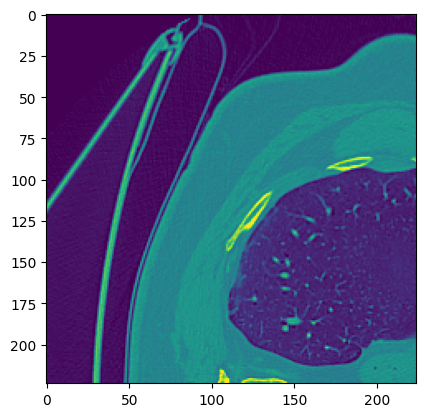

In [8]:
img = train_transforms(datalist[0])

plt.imshow(img[0]["image"][0,:,:,64])